# Image Processing II

In this notebook, the goal is to apply more advanced image processing techniques.

**Program the methods by yourself** (Use cv2 only to read and write your images.)

If you use your code from other sources, mark it and explain what it does.

## PSNR (2P)

Extend your MSE program so that it also outputs the PSNR. The PSNR is calculated with the MSE:

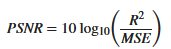

R = maximum fluctuation in the input image data type

What is the PSNR and what is it used for? What is the difference between PSNR and MSE?

MSE: 105.32365798950195
PSNR: 3.8059458702485163


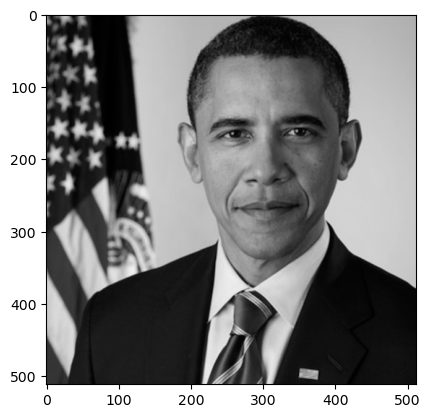

In [6]:
#you are allowed cv.split, cv.imshow ...

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

# Load the two images
image1 = cv2.imread('../../ressources/obama_2.jpg',0)
image2 = cv2.imread('..//..//ressources//obama_3.jpg',0)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Compute the overall MSE
mse = np.mean((image1 - image2)**2)

psnr = 10 * math.log10((255^2)/mse)

print(f"MSE: {mse}")
print(f"PSNR: {psnr}")

cv2.imwrite('obama_2.jpg', image1)
plt.imshow(image1)

#PSNR is for measuring the quality of reconstruction of a signal by comparing the origninal signal with its reconstruction

## Auto-Contrast (2P)

Adjust the contrast of an image 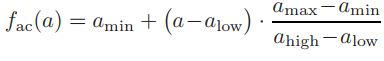

Plot the histogram, before and after applying auto-contrast.

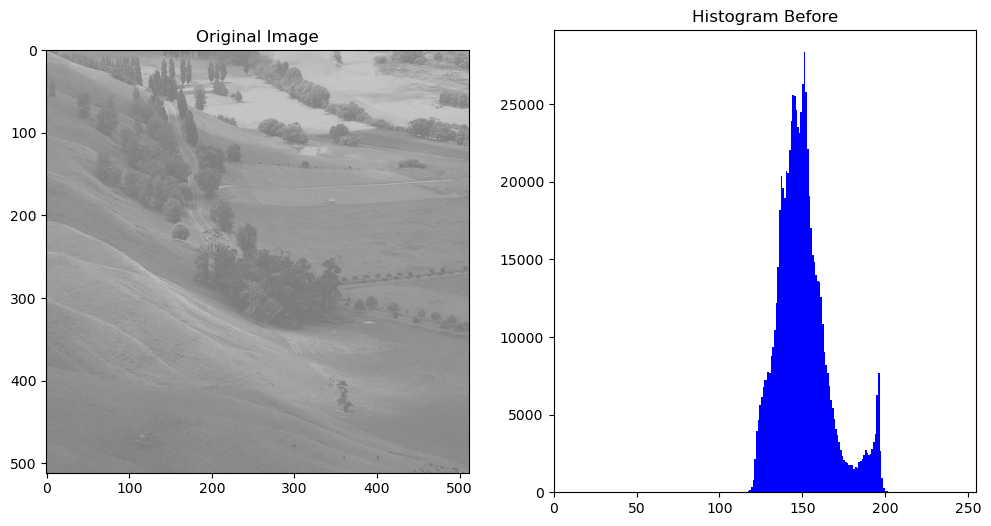

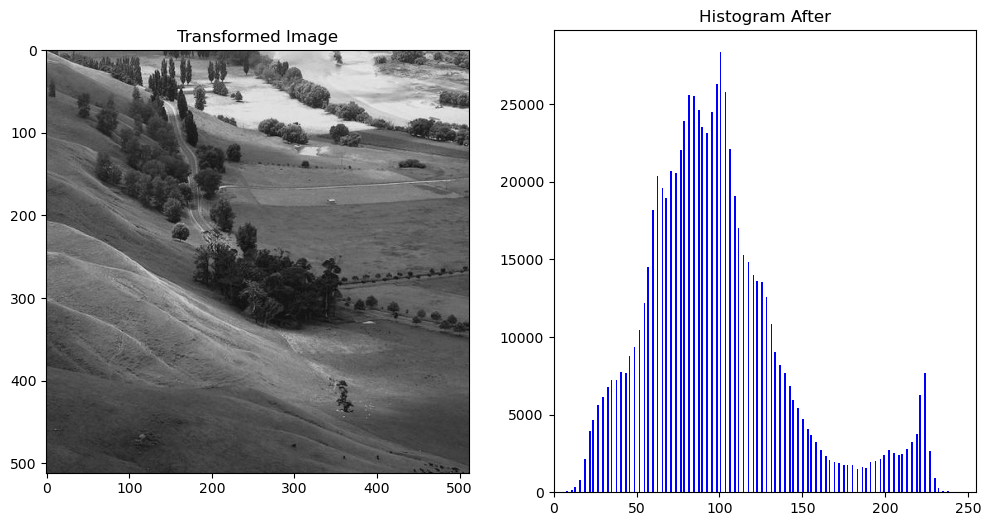

In [97]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

#a max = 255, a min = 0
#a high = highest value of image, a low = lowest value of image

image = cv2.imread('../../ressources/unequalized.png', 1)
image2 = cv2.imread('../../ressources/unequalized.png', 1)


# Calculate the histogram using numpy
hist, bins = np.histogram(image.flatten(), 256, [0, 255])


aHigh = np.max(image)
aLow = np.min(image)
image2 = 0 + (image-aLow) * ((255-0)/(aHigh - aLow))
hist2, bins2 = np.histogram(image2.flatten(), 256, [0, 255])
image2 = image2.astype(np.uint8)


# Display the original image and its histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.title("Histogram Before")
plt.xlim([0, 255])
plt.bar(bins[:-1], hist, width=1, color="b")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Transformed Image')

plt.subplot(1, 2, 2)
plt.title("Histogram After")
plt.xlim([0, 255])
plt.bar(bins2[:-1], hist2, width=1, color="b")

plt.show()

## Robust Autocontrast (2P)

Adjust the contrast of an image 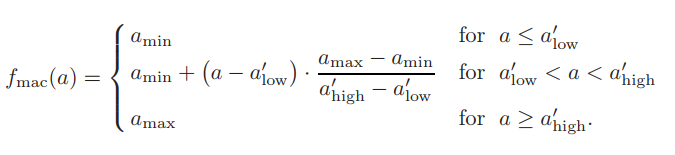

Plot the histogram, before and after robust applying auto-contrast.

[[157 142 139 ... 148 139 158]
 [182 182 170 ... 154 146 164]
 [175 178 188 ... 172 174 161]
 ...
 [136 137 137 ... 141 146 151]
 [136 137 136 ... 144 147 144]
 [135 135 133 ... 150 148 132]]
[115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 208]
138.0
184.0


<BarContainer object of 256 artists>

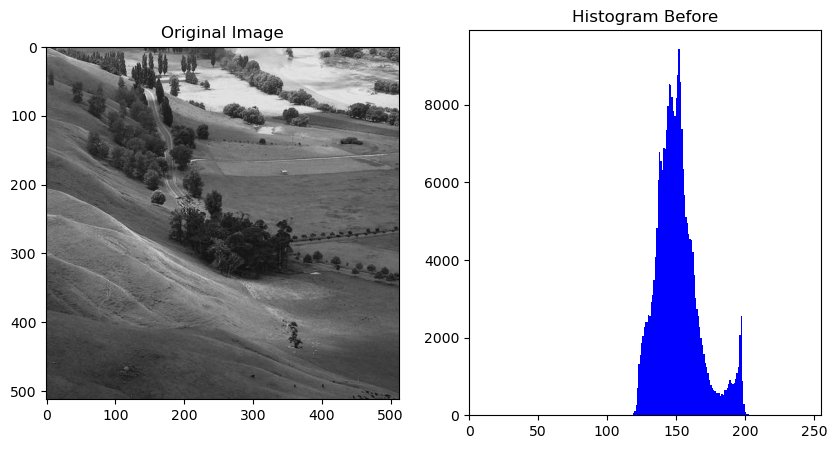

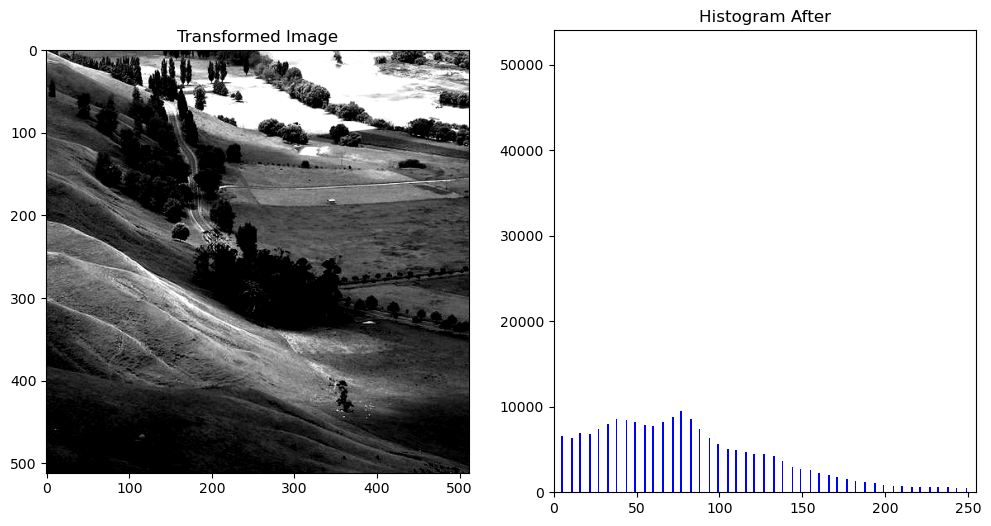

In [91]:
# YOUR CODE HERE
#amin = a<= alow2
#alow2 quantil function 25
#ahigh .... 75

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

image = cv2.imread('../../ressources/unequalized.png', cv2.IMREAD_GRAYSCALE)
hist, bins = np.histogram(image.flatten(), 256, [0, 256])
pixel_values = np.array(image)

unique_values = np.unique(pixel_values)

aLow2 = np.quantile(unique_values, 0.25)
aHigh2 = np.quantile(unique_values  , 0.75)



image2 = cv2.imread('../../ressources/unequalized.png', cv2.IMREAD_GRAYSCALE)

for i in range (image2.shape[0]):
    for j in range (image2.shape[1]):
        if image2[i][j] <= aLow2:
            image2[i][j] = 0
        elif aLow2 < image[i][j] < aHigh2:
           image2[i][j] = 0 + (image2[i][j] - aLow2) * ((255 -0)/(aHigh2 - aLow2))
        elif image2[i][j] >= aHigh2:
            image2[i][j] = 255
# Apply the transformation
#image2 = np.where(image <= aLow2, 0, image)
#image2 = np.where((aLow2 < image) & (image < aHigh2), 0 + (image - aLow2) * ((255 - 0) / (aHigh2 - aLow2)), image)
#image2= np.where(image >= aHigh2, 255, image)
hist2, bins2 = np.histogram(image2.flatten(), 256, [0, 256])
# Display the images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the transformed image
plt.subplot(1, 2, 2)
plt.title("Histogram Before")
plt.xlim([0, 255])
plt.bar(bins[:-1], hist, width=1, color="b")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Transformed Image')

plt.subplot(1, 2, 2)
plt.title("Histogram After")
plt.xlim([0, 255])
plt.bar(bins2[:-1], hist2, width=1, color="b")

## Histogram Equalization (2P)

Adjust the contrast of an image using Histogram Equalization.

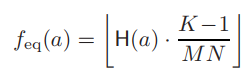

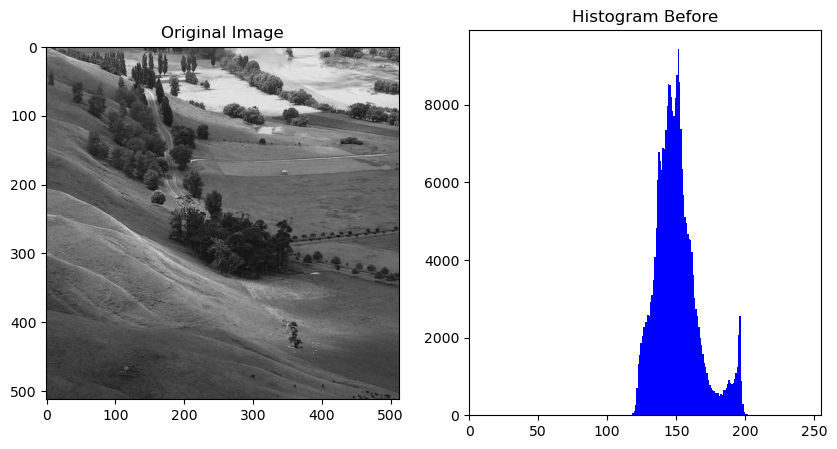

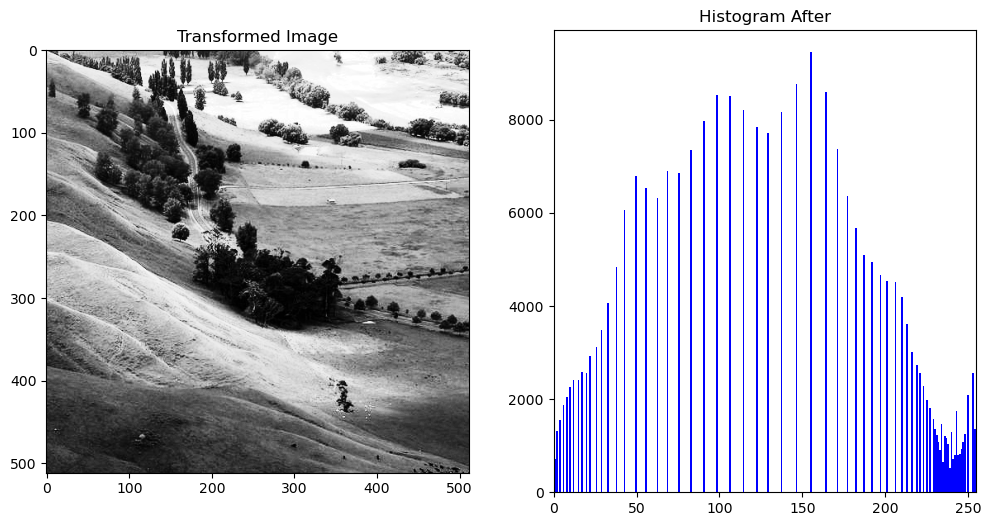

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('../../ressources/unequalized.png',0)
# Calculate the histogram
hist, bins = np.histogram(image.flatten(), 256, [0, 255])
cdf = hist.cumsum()

# Define the parameters
K = 256  # Total number of possible pixel values (intensity levels)
M, N = image.shape[0], image.shape[1]  # Number of rows and columns in the image

# Apply the transformation
image2 = np.round(cdf[image] * (K - 1) / (M * N))
hist2, bins2 = np.histogram(image2.flatten(), 256, [0, 255])

# Display the images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the transformed image
plt.subplot(1, 2, 2)
plt.title("Histogram Before")
plt.xlim([0, 255])
plt.bar(bins[:-1], hist, width=1, color="b")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Transformed Image')

plt.subplot(1, 2, 2)
plt.title("Histogram After")
plt.xlim([0, 255])
plt.bar(bins2[:-1], hist2, width=1, color="b")

plt.show()

## Cross-Correlation (2P)

**In this task you can use all functions of cv2.**

Use the normed correlation coefficient

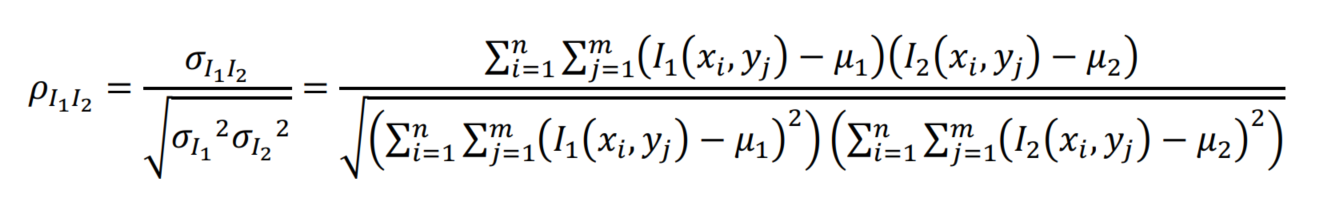

and find Waldo ("waldo.jpg") in the picture "whereiswaldo.jpg". Visualise the correlation coefficient and mark the corresponding position in the original image with a coloured rectangle.

Steps:

1. Read both images "whereiswaldo.jpg" and "waldo.jpg" in grayscale. Hint: cv2.imread
2. Use cv2.matchTemplate to find waldo in the larger image.
3. Save the resulting image from cv2.matchTemplate. Can you see Waldo?
4. Use cv2.rectangle to draw a rectangle around waldo on the original image (in RGB). Save it with the function cv2.imwrite.

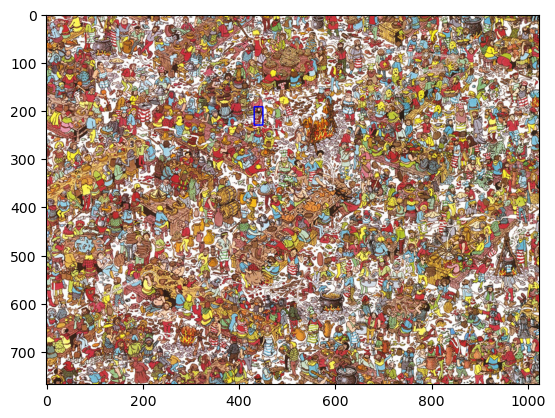

In [107]:
# YOUR CODE HERE
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
wherewaldo = cv2.imread('../../ressources/whereiswaldo.jpg',0)
waldo = cv2.imread('../../ressources/waldo.jpg',0)

result = cv2.matchTemplate(wherewaldo, waldo, cv2.TM_CCOEFF_NORMED)
cv2.imwrite('found_waldo.jpg', result)

# Get the minimum and maximum values and their locations
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw the rectangle around the matched area
h, w= waldo.shape
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

therewaldo = cv2.imread('../../ressources/whereiswaldo.jpg',1)
cv2.rectangle(therewaldo, top_left, bottom_right, 255, 2)
plt.imshow(cv2.cvtColor(therewaldo,cv2.COLOR_BGR2RGB))
cv2.imwrite("wefoundwaldo.jpg", therewaldo)
plt.show()